<a href="https://colab.research.google.com/github/ziminas1990/SkillBox-DataScience/blob/master/module-2-ds-basics/hw_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основы визуализации данных с помощью Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык визуализации данных с помощью простых графиков matplotlib. Научиться использовать визуализацию данных для проверки гипотез и валидации данных

### Описание домашнего задания и формат сдачи

Вам предстоит выполнить задачи по визуализации данных. Для этого  впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку преподавателю.

**Важно учесть:** У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

### Критерии оценки

**"Зачет"** - выполнены задачи 1-9, каждый график отформатирован и читаем

**"На доработку"** - выполнены не все обязательные задачи или какой-либо из график не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Загрузка данных

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте гистограмму распределения объема продаж всех игр в Японии

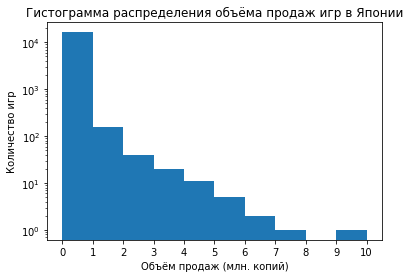

In [3]:
series = df["JP_Sales"]
bins = 10
plt.hist(series, bins=bins)
plt.title("Гистограмма распределения объёма продаж игр в Японии")
plt.xlabel("Объём продаж (млн. копий)")
plt.ylabel("Количество игр")
# log-scaled histogram looks defenitelly better
plt.yscale("log")

# Align labels on axis x
bin_width = series.max() / bins
ticks = [x * bin_width for x in range(bins+1)]
plt.xticks(ticks, [round(x) for x in ticks])

plt.show()

### Задача 2

Постройте столбчатую диаграмму (barchart), показывающую сравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах

Text(0, 0.5, 'Количество копий (млн)')

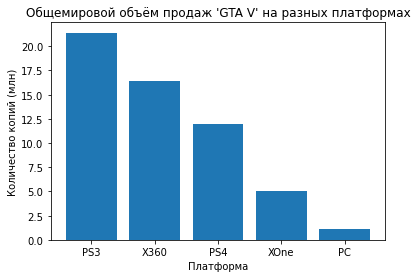

In [4]:
data = df[df["Name"] == "Grand Theft Auto V"][["Platform","Global_Sales"]]
plt.bar(x=data["Platform"], height=data["Global_Sales"])

plt.title("Общемировой объём продаж 'GTA V' на разных платформах")
plt.xlabel("Платформа")
plt.ylabel("Количество копий (млн)")

### Задача 3

Постройте линейный график динамики суммарных общемировых продаж всех игр по годам

Text(0, 0.5, 'Объем продаж (млн)')

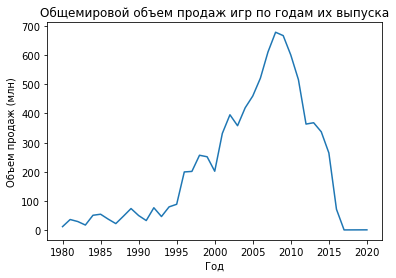

In [5]:
# В таблице нет необходимых данных, т.к. мы знаем только год выпуска игры и сколько
# копий было продано с момента выпуска (а не в год выпуска).
# Поэтому вместо графика "Количество проданных за год X копий" можем
# построить график "Количество проданных копий игр, выпущенных в году X".
# На мой взгляд график совершенно бесмысленный.

data = df[["Year", "Global_Sales"]].groupby("Year").sum()
plt.plot(data)

plt.title("Общемировой объем продаж игр по годам их выпуска")
plt.xlabel("Год")
plt.ylabel("Объем продаж (млн)")

### Задача 4

Постройте точечную диаграмму, показывающую существование зависимости продаж во всем мире от продаж в Северной Америке

Text(0, 0.5, 'Продажи в мире (млн)')

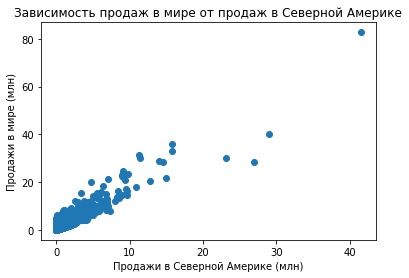

In [6]:
plt.scatter(df["NA_Sales"], df["Global_Sales"])
plt.title("Зависимость продаж в мире от продаж в Северной Америке")
plt.xlabel("Продажи в Северной Америке (млн)")
plt.ylabel("Продажи в мире (млн)")

### Задача 5

Постройте круговую диаграмму процентного соотношения продаж игры "Super Mario Bros." на разных платформах во всем мире. Подпишите доли графика с точностью 1 знак после запятой.

Text(0.5, 1.0, "Соотношение продаж 'Super Mario Bros.' на разных платформах")

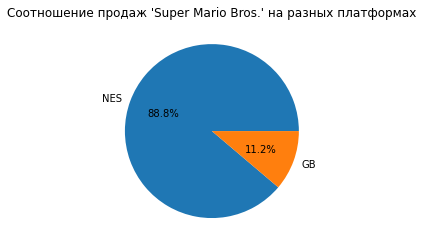

In [7]:
data = df[df["Name"]=="Super Mario Bros."][["Platform", "Global_Sales"]]

plt.pie(x=data["Global_Sales"], labels=data["Platform"], autopct='%1.1f%%')
plt.title("Соотношение продаж 'Super Mario Bros.' на разных платформах")

### Задача 6

Определите 5 издателей, имеющих наибольшие суммарные продажи во всем мире в 2013 году и проиллюстрируйте величину их продаж на столбчатой гистограмме

Text(0, 0.5, 'Объем продаж (млн)')

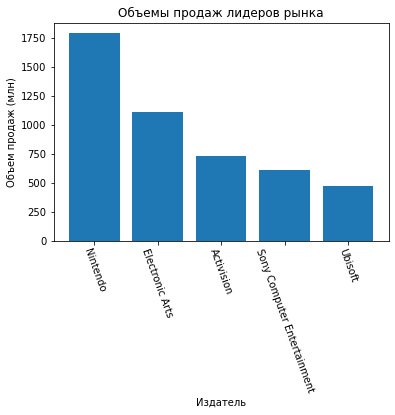

In [8]:
data = df[["Publisher", "Global_Sales"]].groupby("Publisher").sum().sort_values("Global_Sales", ascending=False).head(5)
data
plt.bar(x=data.index, height=data["Global_Sales"])
plt.xticks(rotation=-70)
plt.title("Объемы продаж лидеров рынка")
plt.xlabel("Издатель")
plt.ylabel("Объем продаж (млн)")

### Задача 7

Постройте гистограмму распределения величины общемировых продаж игр, выпущенных не издателем Nintendo, в период с 2000 по 2015 год включительно. Гистограмма для большей точности должна содержать 20 столбцов, отсечки на оси X должны соответствовать границам столбцов.

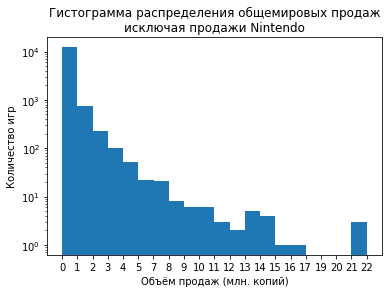

In [9]:
series=df[(df["Publisher"] != "Nintendo") & (df["Year"] <= 2015) & (df["Year"] >= 2000)]["Global_Sales"]

bins = 20
plt.hist(series, bins=bins)
plt.title("Гистограмма распределения общемировых продаж\nисключая продажи Nintendo")
plt.xlabel("Объём продаж (млн. копий)")
plt.ylabel("Количество игр")
# log-scaled histogram looks defenitelly better
plt.yscale("log")

# Align labels on axis x
bin_width = series.max() / bins
ticks = [x * bin_width for x in range(bins+1)]
plt.xticks(ticks, [round(x) for x in ticks])

plt.show()

### Задача 8

Постройте линейный график динамики суммарных мировых продаж игр жанра "Action" по годам

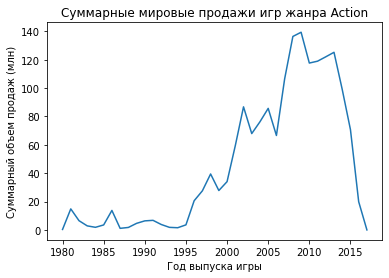

In [21]:
series = df[df["Genre"]=="Action"][["Year", "Global_Sales"]].groupby("Year").sum()

plt.plot(series)
plt.title("Суммарные мировые продажи игр жанра Action")
plt.xlabel("Год выпуска игры")
plt.ylabel("Суммарный объем продаж (млн)")
plt.show()

### Задача 9

С помощью столбчатой диаграммы проиллюстрируйте объем продаж всех игр издателя "Microsoft Game Studios" в Северной Америке за все время в зависимости от жанра. Столбцы расположите по убыванию.

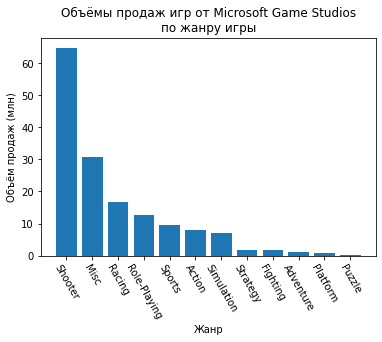

In [41]:
series = df[df["Publisher"]=="Microsoft Game Studios"][["Genre", "NA_Sales"]].groupby("Genre").sum()
series.sort_values("NA_Sales", ascending=False, inplace=True)
plt.bar(x=series.index, height=series["NA_Sales"])

plt.title("Объёмы продаж игр от Microsoft Game Studios\nпо жанру игры")
plt.xlabel("Жанр")
plt.xticks(rotation=-60)
plt.ylabel("Объём продаж (млн)")

plt.show()

## Дополнительные (необязательные) задачи

### Задача 10

Одной из основных задач при анализе данных является проверка данных на корректность и отсутствие ошибок. В датасете "vgsales" одним из потенциальных источников ошибок является столбец с общемировыми продажами. По идее, значение общемировых продаж какой-либо игры должно равняться сумме продаж в Северной Америке, Европе, Японии и остальных странах, в противном случае мы получим ошибку в данных, которая может негативно повлиять на весь дальнейший процесс анализа.

Причин возникновения такой ошибки может быть несколько. Давайте рассмотрим следующие причины:
1. Ошибка округления. В целом, такая ошибка достаточно часто встречается при переводе величин из одних единиц в другие (например, из тысяч копий в миллионы копий).
1. Ошибка вычислений. Такая ситуация требует более серьезного исследования, поскольку она может привести к недостоверным результатам анализа данных.

Будем считать, что в записи имеется ошибка суммирования, если сумма продаж какой-либо игры в Северной Америке, Европе, Японии и остальных странах отличается от общемировых продаж более, чем на 0.01 млн копий.

С помощью круговой диаграммы проиллюстрируйте процент записей в датасете, имеющих такую ошибку суммирования продаж.

Text(0.5, 1.0, 'Соотношение записей с маленькой и большой погрешностью')

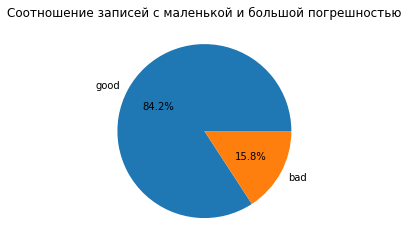

In [68]:
total = df.shape[0]
df["Sales_Error"] = (df["Global_Sales"] - df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum(axis=1)).apply(abs)
bad_total = (df["Sales_Error"] > 0.01).sum()

plt.pie(x=[total-bad_total, bad_total], labels=["good", "bad"], autopct='%1.1f%%')
plt.title("Соотношение записей с маленькой и большой погрешностью")
